# **Image Classifying Algorithm**

# All Installs

In [18]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install keras

In [21]:
pip install --upgrade keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/a3/31/982a0c8da5e06b8e915e09e7cae7f7815eecfef7e9e16fd733b105aa09ab/keras-3.0.4-py3-none-any.whl.metadata
  Using cached keras-3.0.4-py3-none-any.whl.metadata (4.8 kB)
Using cached keras-3.0.4-py3-none-any.whl (1.0 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.4 which is incompatible.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# All Imports

In [22]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)


filtramos los warning que nos dara keras(deprecation)

In [23]:
import os
import random
import shutil
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
from keras.preprocessing import image
from tensorflow import data as tf_data
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, MaxPooling2D, Dropout, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from tensorflow.keras.utils import to_categorical, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Ignore this part or will crush**(una vez separadas imagenes)

importo todas las fotos en una carpeta que luego distribuire

## Import Data Set

In [7]:
data_dir = "C:\\Users\penaf\\Desktop\\repo_github\\archive\\train\\train"

## Import Random Cat vs Dog Images

fotos del data set que son perros, filtradas por dog.numero.jpg

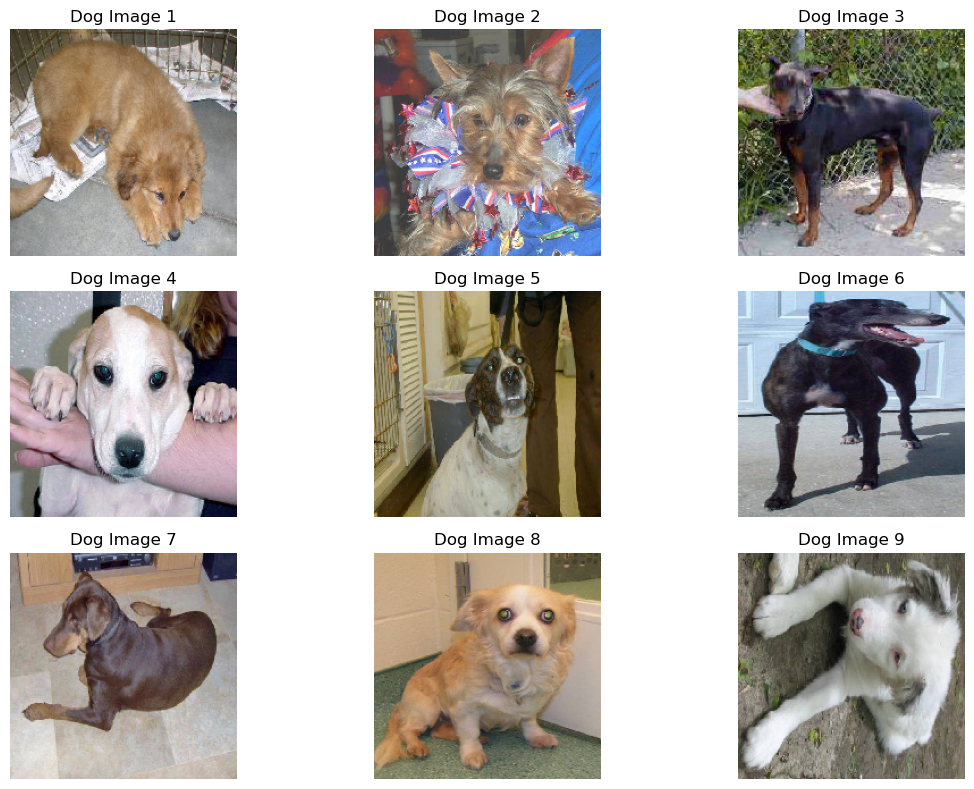

In [8]:
dog_image = "C:\\Users\penaf\\Desktop\\repo_github\\archive\\train\\train"
# Obtener nombres de archivos de perros
dog_image_files = [file for file in os.listdir(dog_image) if file.startswith("dog.")]

# Seleccionar aleatoriamente 9 imágenes de perros
random_dog_images = random.sample(dog_image_files, 9)

# Cargar y mostrar las imágenes de perros
dog_images = []
plt.figure(figsize=(12, 8))

for i, dog_image_file in enumerate(random_dog_images):
    img_path = os.path.join(dog_image, dog_image_file)
    img = image.load_img(img_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array /= 255.0
    dog_images.append(img_array)
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f'Dog Image {i+1}')
    plt.axis('off')


plt.tight_layout()
plt.show()


In [ ]:
"""for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(data_dir, 'dog.' + str(i) + '.jpg')
    image = plt.imread(filename)
    plt.imshow(image)
    plt.axis('off')

plt.show()"""

"for i in range(9):\n    plt.subplot(3, 3, i + 1)\n    filename = os.path.join(data_dir, 'dog.' + str(i) + '.jpg')\n    image = plt.imread(filename)\n    plt.imshow(image)\n    plt.axis('off')\n\nplt.show()"

fotos del data set que son gatos, filtradas por dog.numero.jpg

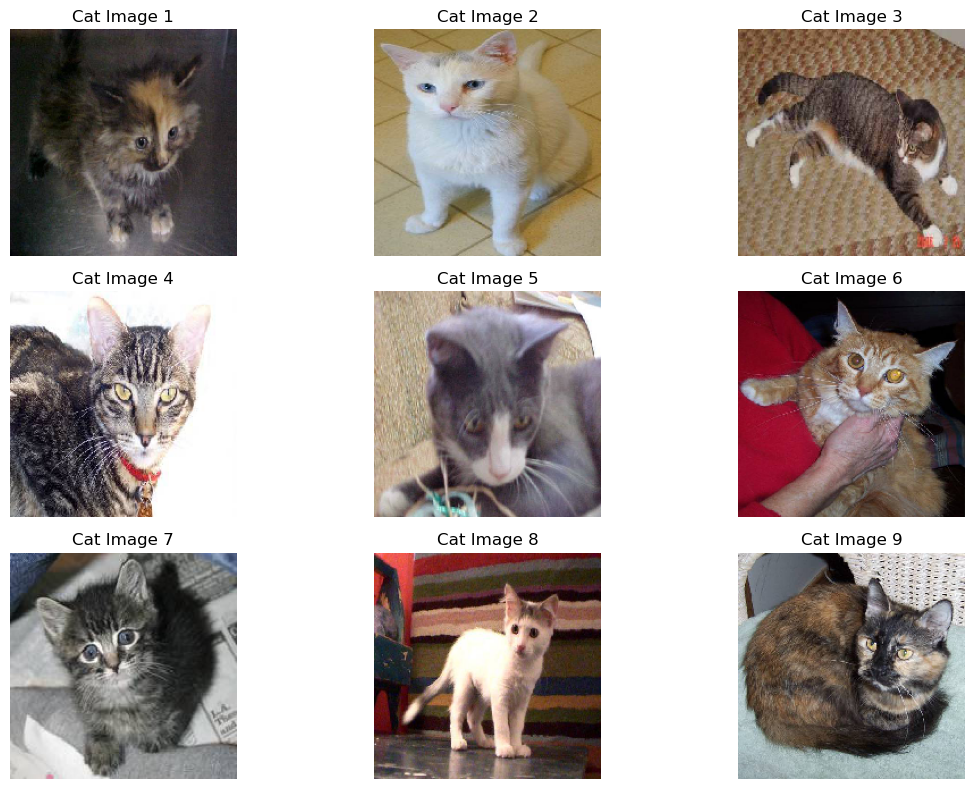

In [9]:
cat_image = "C:\\Users\penaf\\Desktop\\repo_github\\archive\\train\\train"
# Obtener nombres de archivos de perros
cat_image_files = [file for file in os.listdir(cat_image) if file.startswith("cat.")]

# Seleccionar aleatoriamente 9 imágenes de perros
random_cat_images = random.sample(cat_image_files, 9)

# Cargar y mostrar las imágenes de perros
cat_images = []
plt.figure(figsize=(12, 8))

for i, cat_image_file in enumerate(random_cat_images):
    img_path = os.path.join(cat_image, cat_image_file)
    img = image.load_img(img_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cat_images.append(img_array)
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f'Cat Image {i+1}')
    plt.axis('off')


plt.tight_layout()
plt.show()


In [ ]:
"""for i in range(9):
    plt.subplot(3, 3, i + 1)
    filename = os.path.join(data_dir, 'cat.' + str(i) + '.jpg')
    image = plt.imread(filename)
    plt.imshow(image)
    plt.axis('off')

plt.show()"""

"for i in range(9):\n    plt.subplot(3, 3, i + 1)\n    filename = os.path.join(data_dir, 'cat.' + str(i) + '.jpg')\n    image = plt.imread(filename)\n    plt.imshow(image)\n    plt.axis('off')\n\nplt.show()"

In [ ]:
"""# Define a few rules for DataGen
train_dir = "/workspaces/image-classifier-project-tutorial/data/raw/train/train"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"]
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["test"]
)"""

Found 12501 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


## **Error** 

-He descargado carpeta train de Kaggle con 25.000 imagenes

-Tengo que crear carpeta dog y cat y filtrar las imagenes por nombre. Ej: dog.numero.jpg

-Tengo que crear carpeta de test donde movere un 20% de las imagenes para hacer el test, el 20% de las imagenes habra un 50% de cat/dog para tener un test balanceado

-Tengo que crear carpetas de dog/cat y filtrar por nombre y luego ya podre enganchar con el modelo de 4geeks

## Classify dog and cat in Train

In [10]:
import os
import shutil

# Directorios de origen y destino
data_dir = "C:\\Users\penaf\\Desktop\\repo_github\\archive\\train\\train"
cat_dest_dir = "C:\\Users\penaf\\Desktop\\repo_github\\archive\\train\\train\\cat"
dog_dest_dir = "C:\\Users\penaf\\Desktop\\repo_github\\archive\\train\\train\\dog"

# Crear las carpetas de destino si no existen
os.makedirs(cat_dest_dir, exist_ok=True)
os.makedirs(dog_dest_dir, exist_ok=True)

# Lista todos los archivos en el directorio de origen
image_files = os.listdir(data_dir)

# Iterar sobre cada archivo en el directorio de origen
for filename in image_files:
    # Verificar si el archivo es un archivo de gato
    if filename.startswith("cat."):
        # Construir la ruta completa del archivo de origen
        src_path = os.path.join(data_dir, filename)
        # Construir la ruta completa del archivo de destino
        dest_path = os.path.join(cat_dest_dir, filename)
        # Mover el archivo a la carpeta de destino de gato
        shutil.move(src_path, dest_path)
        
    # Verificar si el archivo es un archivo de perro
    elif filename.startswith("dog."):
        # Construir la ruta completa del archivo de origen
        src_path = os.path.join(data_dir, filename)
        # Construir la ruta completa del archivo de destino
        dest_path = os.path.join(dog_dest_dir, filename)
        # Mover el archivo a la carpeta de destino de perro
        shutil.move(src_path, dest_path)
        


#### Create the Images Data Sets

In [19]:
# Define a few rules for DataGen
train_dir = "/workspaces/image-classifier-project-tutorial/data/raw/train/train"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"]
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["test"]
)




Found 0 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


no funcionara diferente carpetas

**It works only with dog&cat folders in test and train**

tendre que no solamente crear carpetas sino cambiar los directorios para una nueva carpeta de test

In [11]:
def listar_directorio(directorio):
    for dirpath, dirnames, filenames in os.walk(directorio):
        print(f"Directorio: {dirpath}")
        print(f"Subdirectorios: {dirnames}")
        print(f"Archivos: {filenames}")
        print("---------------------------")

# Directorio que quieres listar
directorio = "/workspaces/image-classifier-project-tutorial/data/raw/train/train"

# Llamar a la función para mostrar la estructura del directorio
listar_directorio(directorio)


#### creo **la carpeta test** desde la carpeta train, 20% de fotos iran a la carpeta test con un por centage del 50% cat&dog

In [12]:
import os
import random
import shutil

# Definir directorios
data_dir = "C:\\Users\\penaf\\Desktop\\repo_github\\archive\\train\\train"
cat_dest_dir = "C:\\Users\\penaf\\Desktop\\repo_github\\archive\\train\\train\\cat"
dog_dest_dir = "C:\\Users\\penaf\\Desktop\\repo_github\\archive\\train\\train\\dog"
test_dir = "C:\\Users\\penaf\\Desktop\\repo_github\\archive\\train\\test"

# Crear directorio de prueba si no existe
os.makedirs(test_dir, exist_ok=True)

# Obtener nombres de archivos de perros y gatos en train
dog_image_files = [file for file in os.listdir(os.path.join(data_dir, 'dog'))]
cat_image_files = [file for file in os.listdir(os.path.join(data_dir, 'cat'))]

# Seleccionar aleatoriamente el 20% de las imágenes para test
num_test_dog = int(len(dog_image_files) * 0.2)
num_test_cat = int(len(cat_image_files) * 0.2)

random_test_dog = random.sample(dog_image_files, num_test_dog)
random_test_cat = random.sample(cat_image_files, num_test_cat)

# Mover las imágenes seleccionadas a la carpeta de test
for filename in random_test_dog:
    src_path = os.path.join(data_dir, 'dog', filename)
    dest_path = os.path.join(test_dir, filename)
    shutil.move(src_path, dest_path)
    #print(f"Moved {filename} to {test_dir}") #comprobar y comentar

for filename in random_test_cat:
    src_path = os.path.join(data_dir, 'cat', filename)
    dest_path = os.path.join(test_dir, filename)
    shutil.move(src_path, dest_path)
    #print(f"Moved {filename} to {test_dir}") #comprobar y comentar

# Calcular número de imágenes en test y train
num_test_images = len(os.listdir(test_dir))
num_train_images = len(dog_image_files) + len(cat_image_files) - num_test_images
total_images = num_train_images + num_test_images

# Imprimir resultados
print("Número y porcentaje de imágenes en los conjuntos de datos:")
print(f"  - Train: {num_train_images} imágenes")
print(f"  - Test: {num_test_images} imágenes")
print(f"  - Total: {total_images} imágenes")

print("\nPorcentaje de gatos y perros en los conjuntos de datos:")
print("  - Train:")
print(f"    * Gatos: {len(cat_image_files)} imágenes ({len(cat_image_files) / num_train_images * 100:.2f}%)")
print(f"    * Perros: {len(dog_image_files)} imágenes ({len(dog_image_files) / num_train_images * 100:.2f}%)")
print("  - Test:")
print(f"    * Gatos: {num_test_cat} imágenes ({num_test_cat / num_test_images * 100:.2f}%)")
print(f"    * Perros: {num_test_dog} imágenes ({num_test_dog / num_test_images * 100:.2f}%)")

print("\nSelección aleatoria y división de imágenes completadas.")





Número y porcentaje de imágenes en los conjuntos de datos:
  - Train: 20000 imágenes
  - Test: 5000 imágenes
  - Total: 25000 imágenes

Porcentaje de gatos y perros en los conjuntos de datos:
  - Train:
    * Gatos: 12500 imágenes (62.50%)
    * Perros: 12500 imágenes (62.50%)
  - Test:
    * Gatos: 2500 imágenes (50.00%)
    * Perros: 2500 imágenes (50.00%)

Selección aleatoria y división de imágenes completadas.


## Classify dog and cat in Train

In [14]:
import os
import shutil

# Directorio de la carpeta de test
test_dir = "C:\\Users\\penaf\\Desktop\\repo_github\\archive\\train\\test"

# Crear carpetas "cat" y "dog" dentro de la carpeta de test si no existen
cat_test_dir = os.path.join(test_dir, "cat")
dog_test_dir = os.path.join(test_dir, "dog")

os.makedirs(cat_test_dir, exist_ok=True)
os.makedirs(dog_test_dir, exist_ok=True)

# Obtener la lista de archivos en el directorio de test
test_files = os.listdir(test_dir)

# Filtrar y mover las imágenes de gatos a la carpeta "cat" y las imágenes de perros a la carpeta "dog"
for filename in test_files:
    if filename.startswith("cat."):
        src_path = os.path.join(test_dir, filename)
        dest_path = os.path.join(cat_test_dir, filename)
        shutil.move(src_path, dest_path)
        #print(f"Moved {filename} to {cat_test_dir}") #comprobar y comentar
    elif filename.startswith("dog."):
        src_path = os.path.join(test_dir, filename)
        dest_path = os.path.join(dog_test_dir, filename)
        shutil.move(src_path, dest_path)
        #print(f"Moved {filename} to {dog_test_dir}") #comprobar y comentar

#print("Imágenes filtradas y movidas a las carpetas 'cat' y 'dog' dentro de la carpeta de test.") #comprobar y comentar


------------------------------------------------------------------------------------------------------------------------------

# **This part is Safe**(ya tengo las carpetas ordenadas)

## Create the Images Data Sets

In [78]:
from keras.preprocessing.image import ImageDataGenerator

# Define el tamaño de las imágenes y la forma de entrada
image_size = (224, 224)
input_shape = (224, 224, 3)  # Tamaño de entrada correcto (224x224) con 3 canales de color (RGB)

# Define el directorio de entrenamiento y prueba
train_dir = "C:\\Users\\penaf\\Desktop\\repo_github\\archive\\train\\train"
test_dir = "C:\\Users\\penaf\\Desktop\\repo_github\\archive\\train\\test"

# Crea instancias de ImageDataGenerator para el entrenamiento y la prueba
datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Genera los flujos de datos de entrenamiento y prueba
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"]
)

test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
    classes=["dog", "cat"]
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Train The Model

#### Crash the Kernel too complex

In [ ]:
"""from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))"""

2024-02-08 18:11:12.504396: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-02-08 18:11:13.032135: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-02-08 18:11:13.148818: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


Estos parametros(arriba) vienen dados for 4geeks(muy demandantes), he reducido usando chat gpt

1.Importación de módulos: Importamos las clases necesarias de Keras para construir el modelo: Sequential, Dense, Conv2D, MaxPool2D, y Flatten.

2.Inicialización del modelo: Creamos un modelo secuencial vacío llamado model.

3.Capas convolucionales: Añadimos dos capas convolucionales al modelo. La primera capa convolucional tiene 32 filtros con un tamaño de kernel de 3x3, función de activación ReLU y relleno "same" para mantener el tamaño de la imagen. Seguida de una capa de max pooling con un pool size de 2x2. La segunda capa convolucional tiene 64 filtros con un tamaño de kernel de 3x3, función de activación ReLU y relleno "same". También seguida de una capa de max pooling con un pool size de 2x2.

4.Capa totalmente conectada: Aplanamos la salida de las capas convolucionales y añadimos una capa densa (totalmente conectada) con 64 unidades y función de activación ReLU.

5.Capa de salida: Añadimos una capa densa de salida con 2 unidades (una para cada clase en un problema de clasificación binaria) y función de activación softmax para la clasificación.

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# Primera capa convolucional
model.add(Conv2D(input_shape=(224, 224, 3), filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Capa totalmente conectada
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2, activation='softmax'))


Estos parametros recomendados por chat gpt

**Model.Compile** configura el modelo para entrenamiento, seleccionando el algoritmo de entrenamiento o solucionador u optimizador. La función de pérdida o función de costo, que es la función a minimizar para producir mejores parámetros del modelo. Y finalmente las métricas para evaluar el modelo en validación y conjunto de entrenamiento.

In [80]:
from keras import losses

# Compile the Model before Training
#model.compile(loss=losses.categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




**categorical_crossentropy**

**Model.summary** Representa un resumen de cadena de la arquitectura o topología de la red neuronal.

In [81]:
model.summary()  

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 200704)            0         
                                                                 
 dense_18 (Dense)            (None, 64)               

In [ ]:
"""# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])"""

In [82]:
# Train the Model
model.fit(train_data, epochs = 1)

Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001EAD4525620>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001EAD4525620>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original err

## Save our Model to Use it Later

Importación de módulos: Importamos las clases ModelCheckpoint y EarlyStopping desde el módulo callbacks de Keras.

Definición de los callbacks: Creamos dos callbacks, checkpoint y early.

ModelCheckpoint: Este callback guarda el modelo en un archivo (vgg16_1.h5) cada vez que se mejora la precisión de la validación (val_accuracy). El argumento save_best_only = True garantiza que solo se guarde el mejor modelo basado en la precisión de la validación.
EarlyStopping: Este callback detiene el entrenamiento del modelo si no se observa una mejora en la precisión de la validación (val_accuracy) durante un número determinado de épocas (en este caso, 3 épocas).
Entrenamiento del modelo: Utilizamos el método fit del modelo (model) para entrenar el modelo. Pasamos los datos de entrenamiento (train_data) y los datos de validación (test_data). Específicamente:

steps_per_epoch = 100: Especifica el número de pasos a ejecutar en cada época de entrenamiento. Esto generalmente se establece en el número total de muestras de entrenamiento dividido por el tamaño del lote.
validation_steps = 10: Especifica el número de pasos a ejecutar en cada época de validación. Esto generalmente se establece en el número total de muestras de validación dividido por el tamaño del lote.
epochs = 3: Especifica el número total de épocas de entrenamiento.
Callbacks durante el entrenamiento: Pasamos los callbacks checkpoint y early al argumento callbacks de fit. Esto asegura que estos callbacks se ejecuten durante el entrenamiento del modelo.

In [83]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist1 = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 0.6472 - accuracy: 0.6166WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001EAAC84EF20> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x000001EAAC84EF20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x000001EAAC84EF20>. Note that functions defined in certain environments, like the intera

## Accuracy Test

(["accuracy"]): Grafica la precisión del entrenamiento (accuracy) en cada época. Esta métrica muestra qué tan bien el modelo está clasificando las muestras de entrenamiento durante el entrenamiento.


(["val_accuracy"]): Grafica la precisión de la validación (val_accuracy) en cada época. Esta métrica muestra qué tan bien el modelo está clasificando las muestras de validación durante el entrenamiento. Es importante monitorear esta métrica para el sobreajuste


(["loss"]): Grafica la pérdida del entrenamiento (loss) en cada época. Esta métrica muestra la cantidad de error del modelo durante el entrenamiento


(["val_loss"]): Grafica la pérdida de la validación (val_loss) en cada época. Esta métrica muestra la cantidad de error del modelo en las muestras de validación durante el entrenamiento. Es importante monitorear esta métrica para evitar el sobreajuste.

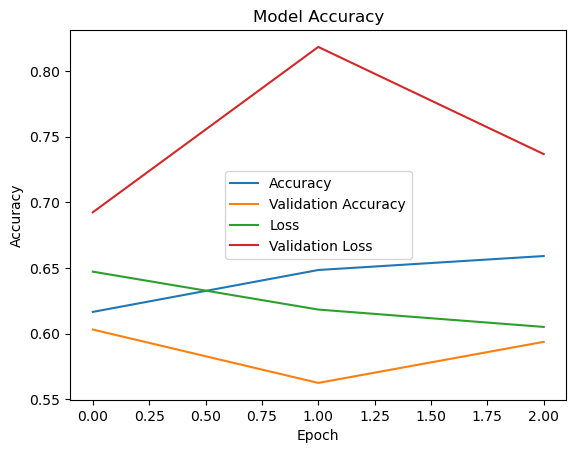

In [84]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["val_accuracy"])
plt.plot(hist1.history["loss"])
plt.plot(hist1.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

## Predict

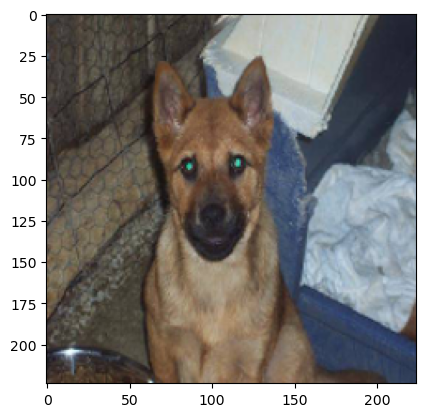

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001EAAFFD39C0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001EAAFFD39C0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

In [85]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = image.load_img("C:/Users/penaf/Desktop/repo_github/archive/train/test/dog/dog.32.jpg", target_size=(200, 200))
img = img.resize((224, 224))

# Convertir la imagen a un array numpy
img = np.asarray(img)

# Mostrar la imagen
plt.imshow(img)
plt.show()

# Expandir las dimensiones para que coincida con el formato de entrada del modelo
img = np.expand_dims(img, axis=0)

# Cargar el modelo guardado
saved_model = load_model("../models/vgg16_1.h5")

# Realizar la predicción
output = saved_model.predict(img)

# Imprimir el resultado de la predicción
if output[0][0] > 0.5:
    print("Gato")
else:
    print("Perro")


# Save Model

In [ ]:
"""from pickle import dump

dump(model, open("", "wb"))"""

---------------------------------------------------------------------------------------------------------------------

### Probar diferentes modelos recomendados por chat

In [86]:
from keras.preprocessing.image import ImageDataGenerator

# Define el tamaño de las imágenes y la forma de entrada
image_size = (224, 224)
input_shape = (224, 224, 3)  # Tamaño de entrada correcto (224x224) con 3 canales de color (RGB)

# Define el directorio de entrenamiento y prueba
train_dir = "C:\\Users\\penaf\\Desktop\\repo_github\\archive\\train\\train"
test_dir = "C:\\Users\\penaf\\Desktop\\repo_github\\archive\\train\\test"

# Crea instancias de ImageDataGenerator para el entrenamiento y la prueba
datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Genera los flujos de datos de entrenamiento y prueba
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"]
)

test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
    classes=["dog", "cat"]
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


completo

In [87]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


# Define el tamaño de las imágenes y la forma de entrada
image_size = (224, 224)
input_shape = (224, 224, 3)  # Tamaño de entrada correcto (224x224) con 3 canales de color (RGB)

# Define el directorio de entrenamiento y prueba
train_dir = "C:\\Users\\penaf\\Desktop\\repo_github\\archive\\train\\train"
test_dir = "C:\\Users\\penaf\\Desktop\\repo_github\\archive\\train\\test"

# Crea instancias de ImageDataGenerator para el entrenamiento y la prueba
datagentrain = ImageDataGenerator(rescale=1./255)
datagentest = ImageDataGenerator(rescale=1./255)

# Genera los flujos de datos de entrenamiento y prueba
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,  # Tamaño del lote
    class_mode='binary',  # Modo de clasificación binaria
)

test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=32,  # Tamaño del lote
    class_mode='binary',  # Modo de clasificación binaria
)

# Modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])




Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


**Binary_crossentropy**

train and test, supongo que el correcto

In [88]:
model.summary()  

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 26, 26, 128)     

In [89]:
model.fit(train_data, epochs=2, validation_data=test_data) 

Epoch 1/2
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001EAAFFEE8E0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001EAAFFEE8E0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Or

625/625 [==============================] - ETA: 0s - loss: 0.6028 - accuracy: 0.6662WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001EAACCB0CC0> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x000001EAACCB0CC0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x000001EAACCB0CC0>. Note that functions defined in certain environments, like the interactive Pyth

## Ssave to use later

In [90]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h6", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist2 = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 5, callbacks = [checkpoint, early])

Epoch 1/5


100/100 [==============================] - ETA: 0s - loss: 0.3821 - accuracy: 0.8300
Epoch 1: val_accuracy improved from -inf to 0.77500, saving model to ../models\vgg16_1.h6
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001EAACCB3560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001EAACCB3560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should d

INFO:tensorflow:Assets written to: ../models\vgg16_1.h6\assets


100/100 [==============================] - 58s 580ms/step - loss: 0.3821 - accuracy: 0.8300 - val_loss: 0.4664 - val_accuracy: 0.7750
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.3842 - accuracy: 0.8284
Epoch 2: val_accuracy improved from 0.77500 to 0.80313, saving model to ../models\vgg16_1.h6
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001EAAFAC05E0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001EAAFAC05E0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001EAAFAC05E0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ../models\vgg16_1.h6\assets


INFO:tensorflow:Assets written to: ../models\vgg16_1.h6\assets


100/100 [==============================] - 56s 560ms/step - loss: 0.3842 - accuracy: 0.8284 - val_loss: 0.4247 - val_accuracy: 0.8031
Epoch 3/5
100/100 [==============================] - ETA: 0s - loss: 0.3536 - accuracy: 0.8391
Epoch 3: val_accuracy improved from 0.80313 to 0.80625, saving model to ../models\vgg16_1.h6
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001EAACCB3560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001EAACCB3560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001EAACCB3560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ../models\vgg16_1.h6\assets


INFO:tensorflow:Assets written to: ../models\vgg16_1.h6\assets


100/100 [==============================] - 50s 504ms/step - loss: 0.3536 - accuracy: 0.8391 - val_loss: 0.4511 - val_accuracy: 0.8062
Epoch 4/5
100/100 [==============================] - ETA: 0s - loss: 0.3351 - accuracy: 0.8581
Epoch 4: val_accuracy did not improve from 0.80625
100/100 [==============================] - 50s 496ms/step - loss: 0.3351 - accuracy: 0.8581 - val_loss: 0.4778 - val_accuracy: 0.8000
Epoch 5/5
100/100 [==============================] - ETA: 0s - loss: 0.3167 - accuracy: 0.8637
Epoch 5: val_accuracy did not improve from 0.80625
100/100 [==============================] - 50s 504ms/step - loss: 0.3167 - accuracy: 0.8637 - val_loss: 0.4792 - val_accuracy: 0.7906


## Accuracy Test

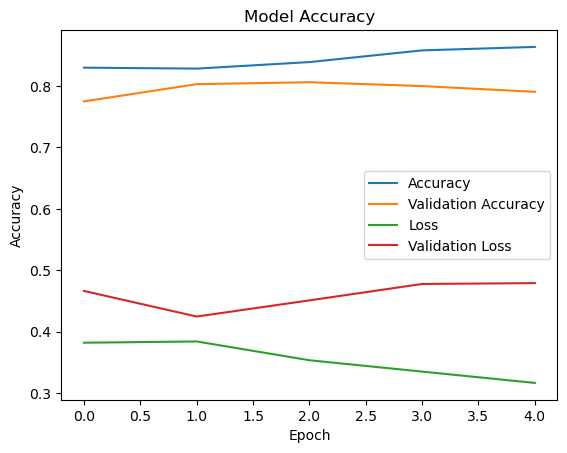

In [91]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["val_accuracy"])
plt.plot(hist2.history["loss"])
plt.plot(hist2.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

## Predict

In [93]:
print(output.shape)


(1, 1)


In [94]:
print(output)


[[1.]]


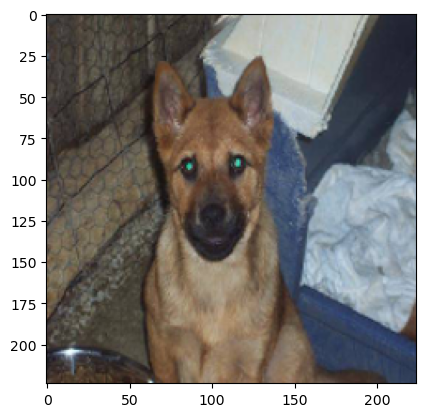

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001EAB75E1F80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001EAB75E1F80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001EAB75E1F80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 73ms/step
Perro


In [95]:
from keras.preprocessing import image
from keras.models import load_model

# Cargar la imagen
img = image.load_img("C:/Users/penaf/Desktop/repo_github/archive/train/test/dog/dog.32.jpg", target_size=(200, 200))
img = img.resize((224, 224))

# Convertir la imagen a un array numpy
img = np.asarray(img)

# Mostrar la imagen
plt.imshow(img)
plt.show()

# Expandir las dimensiones para que coincida con el formato de entrada del modelo
img = np.expand_dims(img, axis=0)

# Cargar el modelo guardado
saved_model = load_model("../models/vgg16_1.h6")

# Realizar la predicción
output = saved_model.predict(img)

# Imprimir el resultado de la predicción
if output[0][0] >= 0.5:
    print("Perro")
else:
    print("Gato")


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001EAB1472160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001EAB1472160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000001EAB1472160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 296ms/step


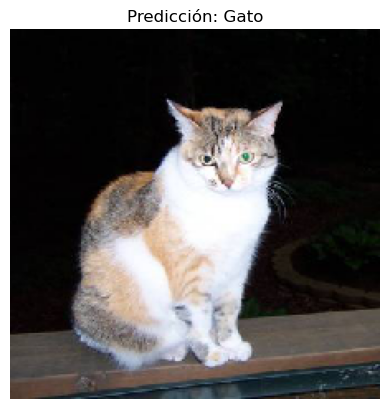

1/1 [==============================] - 0s 54ms/step


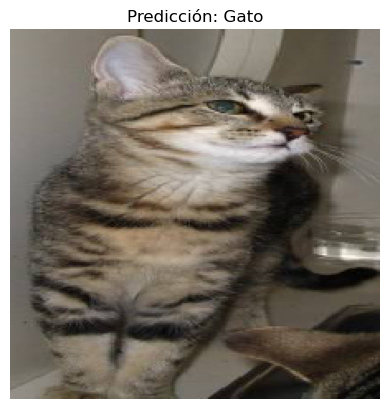

1/1 [==============================] - 0s 45ms/step


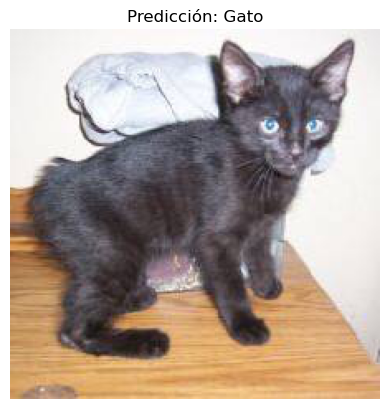

1/1 [==============================] - 0s 47ms/step


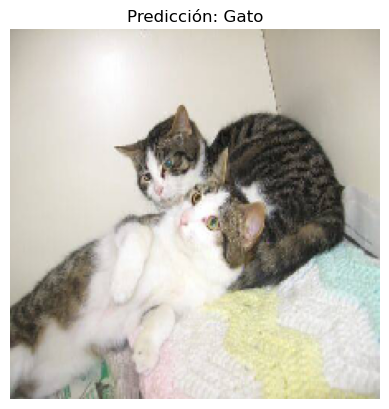

1/1 [==============================] - 0s 55ms/step


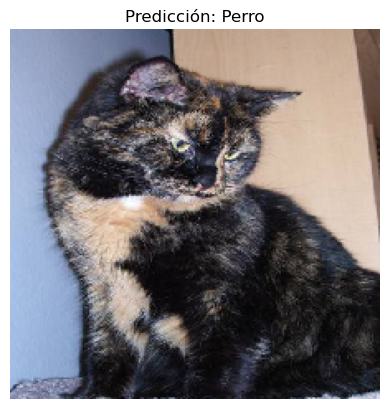

1/1 [==============================] - 0s 52ms/step


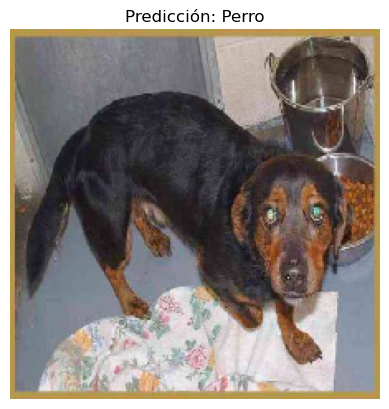

1/1 [==============================] - 0s 45ms/step


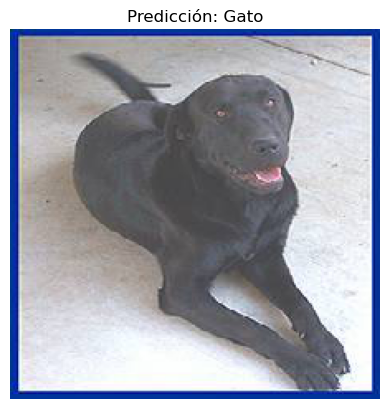

1/1 [==============================] - 0s 46ms/step


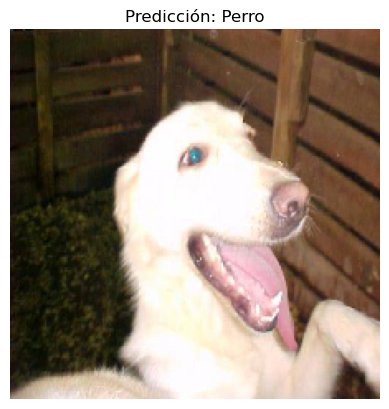

1/1 [==============================] - 0s 48ms/step


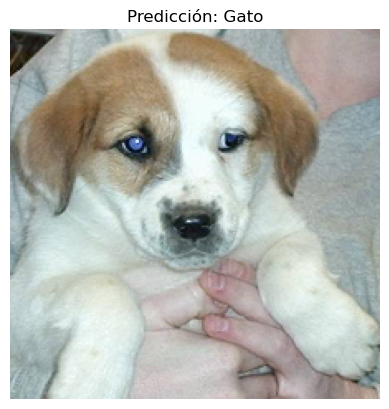

1/1 [==============================] - 0s 42ms/step


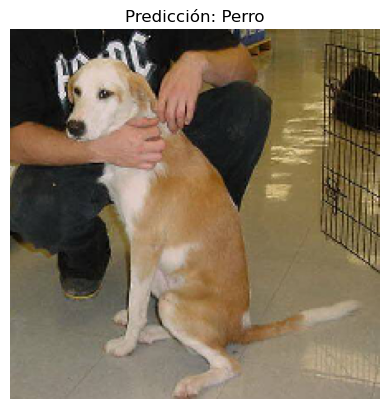

In [105]:
# Directorios de las imágenes de prueba de gatos y perros
cat_dir = "C:/Users/penaf/Desktop/repo_github/archive/train/test/cat"
dog_dir = "C:/Users/penaf/Desktop/repo_github/archive/train/test/dog"

# Lista de archivos de gatos y perros en los directorios
cat_files = [file for file in os.listdir(cat_dir)]
dog_files = [file for file in os.listdir(dog_dir)]

# Seleccionar aleatoriamente 5 imágenes de gatos y 5 imágenes de perros
selected_cat_files = random.sample(cat_files, 5)
selected_dog_files = random.sample(dog_files, 5)

# Cargar el modelo guardado
saved_model = load_model("../models/vgg16_1.h6")

# Función para hacer predicciones y mostrar las imágenes
def predict_and_show_images(file_paths, label):
    for file in file_paths:
        # Cargar la imagen y ajustar su tamaño
        img = image.load_img(os.path.join(label, file), target_size=(224, 224))
        # Convertir la imagen a un array numpy y expandir las dimensiones
        img_array = np.expand_dims(image.img_to_array(img), axis=0)
        # Realizar la predicción
        prediction = saved_model.predict(img_array)
        # Determinar la etiqueta de la predicción
        if prediction[0][0] >= 0.5:
            prediction_label = "Perro"
        else:
            prediction_label = "Gato"
        # Mostrar la imagen y la predicción
        plt.imshow(img)
        plt.title(f"Predicción: {prediction_label}")
        plt.axis('off')
        plt.show()

# Mostrar 5 imágenes de gatos
predict_and_show_images(selected_cat_files, cat_dir)

# Mostrar 5 imágenes de perros
predict_and_show_images(selected_dog_files, dog_dir)



# Save model

In [35]:
"""from pickle import dump

dump(model, open("", "wb"))"""

'from pickle import dump\n\ndump(model, open("", "wb"))'